# Dinámica No Lineal
## Trabajos Prácticos: péndulo Simple

#### Ejercicio 1:
Representar el espacio de fases del Hamiltoniano
$$H(p,q) = \frac{p^{2}}{2} - \omega_{0}^{2} \cos q$$
mediante la integración numérica de las ecuaciones de movimiento para 20 valores de $H(p,q) = h$. considere $\omega_{0} = 1$, $h \lt 1$, $h = 1$ y $h \gt 1$.

#### Resolución Ejercicio 1:
Presentaremos aquí algunos detalles importantes para la resolución del primer ejercicio de la práctica del péndulo simple, así como partes de código en lenguaje ```Python``` que muestran una manera de hallar las cantidades, asi como realizar los gráficos que se piden. 

Cabe aclarar que la integración numérica de las ecuaciones de movimiento pueden hacerse en cualquier otro lenguaje de programación como ```FORTRAN``` y cuyo código se incluye en forma de código para aquellos que prefieran la utilización de este lenguaje.

Para resolver este problema tenemos algunas formas que plantean diferentes maneras de llegar a la solución. Para comenzar, intentaremos directamente integrar las ecuaciones de movimiento del péndulo, que son aquellas que salen de aplicar la teoría Hamiltoniana al Hamiltoniano del péndulo presentado en el enunciado del problema:

$\begin{align*}
&\dot{q} = \frac{\partial H}{\partial p}\\
&\dot{p} = -\frac{\partial H}{\partial q}
\end{align*}$

Para el caso del Hamiltoniano del péndulo estas toman la forma:

$\begin{align*}
&\dot{q} = p\\
&\dot{p} = -\omega_{0}^{2} \sin q
\end{align*}$

y para integrar numéricamente estas ecuaciones diferenciales, necesitamos además tener definidas las condiciones iniciales. 

Ahora bien, las trayectorias del péndulo en el espacio de fases no pueden ser cualesquiera, son aquellas para los cuales los valores del par $(q,p)$ sobre una trayectoria para un valor de $h$ satisfacen la relación:

$\begin{align*}
&H(q,p) = \frac{p^{2}}{2} - \omega_{0}^{2} \cos q = h,\\
\end{align*}$

para cualquier par $(q,p)$. De modo que podemos intentar hallar todos los pares $(q,p)$ que satisfacen la ecuación anterior para cada valor especificado de $h$. 

Esta es la manera que plantearemos a continuación

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Hamiltoniano(p, q, om0=1.0):
    """
    Descripcion:
    Esta funcion no es mas que la funcion Hamiltoniano del
    pendulo simple. Para dos valores dados de la coordenada
    q y el momento p, devuelve el valor del hamiltoniano h.
    
    Parametros:
    ----------
    p: float, 
        valor momento asociado a la coordenada q del problema
    q: float,
        valor de la coordenada del problema
    om0: float (opcional, toma el valor 1.0 por defecto),
        parametro del hamiltoniano. Define la escala del problema
        
    Retorna:
    -------
    h: float,
        valor de la energia del sistema para los valores ingresados
        de p y q.
    """
    
    termp = 0.5*p*p
    termq = om0*om0*np.cos(q)
    
    h = termp - termq
    
    return h

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


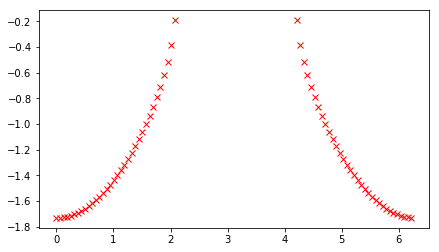

In [2]:
# definimos primero el valor de h
h = 0.5
# fijamos el valor de omega_{0}
om0 = 1.0


# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))

# nos armamos un array que vaya desde 0 a 2pi con intervalos
# pequeños y seran todos los valores que tome la variable q
q = np.arange(0, 2*np.pi, np.pi/50.)
# calculamos el valor de p despejado del hamiltoniano
p = -np.sqrt(2.0*(h + om0**2*np.cos(q)))

# grafiquemos p contra q
ax.plot(q, p, 'rx')
# mostramos el grafico
plt.show()

Lo primero que podemos notar es que el codigo devuelve un ```RuntimeWarning: Invalid value encountered in sqrt```. Esto significa que cuando se intenta calcular el valor de p para cada uno de los valores de q del array, hay algunos valores para los cuales la raiz cuadrada toma valores de su argumento negativos. Es decir, dados un valor definido de $h$ y de $q_{0}$, no siempre existirá un valor para $p_{0}$.

Otra cuestión importante que podemos observar del grafico anterior es que pareciera estar partido en $q = 0$ o $q = 2\pi$.  También podemos notar que pareciera faltar toda la parte "superior" del gráfico, lo cual tiene sentido, ya que para calular el $p_{0}$ correspondiente hemos tomado solamente la parte negativa de la raiz.

Es decir que a la hora de definir las posibles condiciones iniciales para el problema debemos tener algunas consideraciones en mente. 

Volvamos ahora a intentar graficar los valores de $p$ y $q$ que satisfacen la ecuación Hamiltoniana igualada a un valor fijo de $h$, pero esta vez tomando en cuenta las cuestiones que hemos dicho previamente.


Definido un valore de $h$ para el nivel de energía del Hamiltoniano, podemos intentar calcular cuales serán los valores de q para los cuales existirá movimiento, es decir, podremos hallar valores de $p$ correspondientes a partir del Hamiltoniano igualado a la energía. Estos valores extremos para $q$ son aquellos que satisfacen

$\begin{align*}
&H(q,0) = - \omega_{0}^{2} \cos q = h,\\
&q = \arccos \left(-\frac{h}{\omega_{0}^{2}}\right),
\end{align*}$

cuyas soluciones son dos y tendrán la misma magnitud pero distinto signo. Estos dos valores serán aquellos entre los cuales tenemos que variar $q$ para poder hallar valores de $p$ que no arrojen errores.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


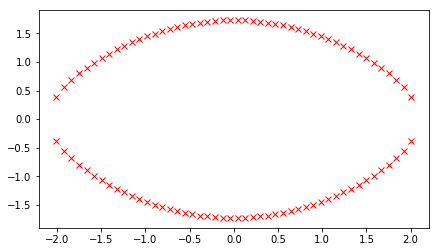

In [3]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))

# nos armamos un array para q que vaya desde qmin a qmax con intervalos
# pequeños y seran todos los valores que tome la variable q
# calculamos el valor extremo (sin importar si el que devuelve la funcion
# es el positivo o el negativo)
qlim = np.arccos(-h/(om0*om0))
# guardamos ambos valores en una lista
qminqmax = [-qlim, qlim]
# para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
# ordenamos la lista de menor a mayor
qminqmax.sort()

# usamos qminqmax[1]+deltaq como valor final pues la funcion np.arange
# excluye el ultimo punto. Por lo tanto si usáramos solo qminqmax[1]
# como ultimo valor, este estaria excluido. De esta forma el valor extremo
# de q esta incluido.
q = np.linspace(qminqmax[0], qminqmax[1], num=50)

# calculamos el valor de p despejado del hamiltoniano
# por un lado la parte negativa
pneg = -np.sqrt(2.0*(h + om0**2*np.cos(q)))
# por el otro la parte positiva
ppos = np.sqrt(2.0*(h + om0**2*np.cos(q)))

# grafiquemos p contra q
ax.plot(q, pneg, 'rx')
ax.plot(q, ppos, 'rx')

# mostramos el grafico
plt.show()

Vemos ahora que si bien el gráfico pareciera estar mas de acuerdo con lo que esperábamos, aun tenemos un problema al evaluar la raiz cuadrada, y por lo tanto, pareciera que tenemos un problema o una falta de puntos en los valores extremos de la variable $q$.

Para solucionar esto, lo que haremos es modificar muy poco los valores extremos en la lista final de valores de $q$ que usamos para obtener los valores. 

Probamos entonces una vez mas teniendo esto en cuenta

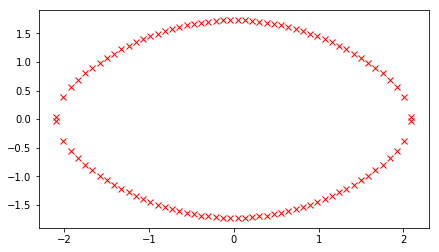

In [4]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))

# nos armamos un array para q que vaya desde qmin a qmax con intervalos
# pequeños y seran todos los valores que tome la variable q
# calculamos el valor extremo (sin importar si el que devuelve la funcion
# es el positivo o el negativo)
qlim = np.arccos(-h/(om0*om0))
# guardamos ambos valores en una lista
qminqmax = [-qlim, qlim]
# para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
# ordenamos la lista de menor a mayor
qminqmax.sort()
# armamos el array
q = np.linspace(qminqmax[0], qminqmax[1], num=50)
# modificamos el primer y último valor de este array
eps = 0.001
q[0] = q[0]+eps
q[-1] = q[-1]-eps

# calculamos el valor de p despejado del hamiltoniano
# por un lado la parte negativa
pneg = -np.sqrt(2.0*(h + om0**2*np.cos(q)))
# por el otro la parte positiva
ppos = np.sqrt(2.0*(h + om0**2*np.cos(q)))

# grafiquemos p contra q
ax.plot(q, pneg, 'rx')
ax.plot(q, ppos, 'rx')

# mostramos el grafico
plt.show()

ahora sí pareciera que el código para graficar funciona correctamente. Ahora bien, hasta ahora solo hemos definido un valor de $h$, y a partir de igualar la función Hamiltoniana a ese valor de $h$, hemos hallado los valores de $p$ y $q$ que son solución de esa ecuacion.

Es decir, los puntos que hemos graficado anteriormente, son puntos de la trayectoria que recorre el sistema (en el espacio de fases del mismo) que es solución de las ecuaciones de movimiento que se pueden definir a traves de las ecuaciones de Hamilton.

Podemos ahora intentar tomar distintos valores del nivel de energía y ver cómo cambia la trayectoria del sistema en el espacio de fases (o bien la solución del problema).

In [5]:
def solucion_pendulo(h, N=100, om0=1.0):
    """
    Descripcion:
    Esta función toma un valor de h para igualar el hamiltoniano del
    pendulo, y resuelve la trayectoria del sistema en el espacio de
    fases simplemente encontrando los valores de q y p que satisfacen
    la condicion H(q,p) = h. La funcion retorna un arrayde valores q,p
    que satisfacen la ecuacion H(p,q)=h.
    
    Parametros:
    ----------
    h: float,
        valor de la energia para calcular la trayectoria en el plano p,q.
    N: int (opcional, toma el valor 100 por defecto),
        numero de puntos donde evaluar la trayectoria. Si no es par
        el codigo arroja un error.
    om0: float (opcional, toma el valor 1.0 por defecto),
        parametro del hamiltoniano. Define la escala del problema
        
    Retorna:
    -------
    sol: ndarray,
        matriz de Nx2, donde N es la cantidad de puntos donde evaluar la
        trayectoria y el 2 corresponde a una columna para q y otra para p.
    """
    
    # chequeo de la paridad de N
    # % es la funcion modulo, o resto en la division entre dos numeros.
    assert N%2 == 0, "El numero de puntos debe ser par!"
    
    # valores limite de q
    qlim = np.arccos(-h/(om0*om0))
    # guardamos ambos valores en una lista
    qminqmax = [-qlim, qlim]
    # para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
    # ordenamos la lista de menor a mayor
    qminqmax.sort()
    # armamos el array
    N2 = int(N/2)
    q = np.linspace(qminqmax[0], qminqmax[1], num=N2)
    # modificamos el primer y último valor de este array
    eps = 0.001
    q[0] = q[0]+eps
    q[-1] = q[-1]-eps

    # calculamos el valor de p despejado del hamiltoniano
    # por un lado la parte negativa
    pneg = -np.sqrt(2.0*(h + om0**2*np.cos(q)))
    # por el otro la parte positiva
    ppos = np.sqrt(2.0*(h + om0**2*np.cos(q)))

    # armamos el array completo para retornar
    sol = np.ndarray((2,N))
    
    sol[0][:N2] = q
    sol[0][N2:] = q
    sol[1][:N2] = pneg
    sol[1][N2:] = ppos
    
    return sol

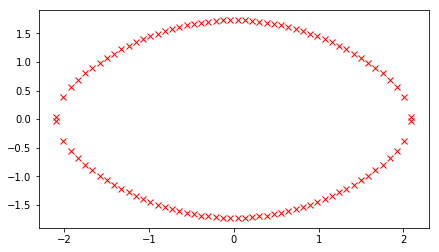

In [6]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))

# llamamos a la funcion con un valor de h igual al que usamos antes
# para chequear que todo este funcionando bien
sol = solucion_pendulo(0.5, N=100)
ax.plot(sol[0], sol[1], 'rx')
plt.show()

Estamos ahora en condiciones de realizar un lazo sobre los valores de la energía $h$, y ver cómo cambian las trayectorias para los diferentes valores. Vamos a tomar en principio 20 valores diferentes como se sugiere en el enunciado del problema

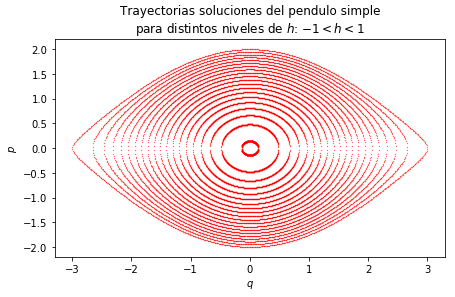

In [7]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))

# creamos un array con todos los valores de h que vamos a usar
h_list = np.linspace(-0.99,0.99, 20)
for h in h_list:
    sol = solucion_pendulo(h,N=1000)
    ax.plot(sol[0], sol[1], 'r.', markersize=0.5)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$q$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectorias soluciones del pendulo simple\npara distintos niveles de $h$: $-1<h<1$')

plt.show()


Claramente este gráfico es mucho más interesante que los anteriores. Observemos primero que todas las trayectorias parecen estar siempre acotadas en su rango de variación de la variable $q$, nunca llegando esta variabla a tomar valores de $-\pi$ o bien de $\pi$. Para visualizarlo mejor, grafiquemos junto con las soluciones obtenidas dos lineas verticales que pasen por estos dos puntos, y ampliemos un poco el rango de valores de $q$ que se pueden ver en el gráfico.

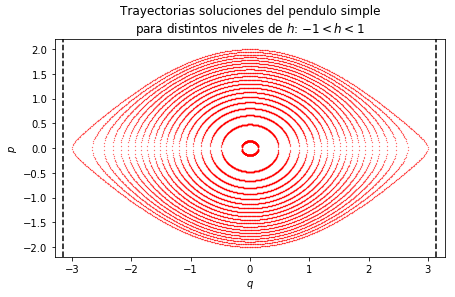

In [8]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))

# creamos un array con todos los valores de h que vamos a usar
h_list = np.linspace(-0.99,0.99, 20)
for h in h_list:
    sol = solucion_pendulo(h,N=1000)
    ax.plot(sol[0], sol[1], 'r.', markersize=0.5)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$q$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectorias soluciones del pendulo simple\npara distintos niveles de $h$: $-1<h<1$')
# rango en el eje de las x
ax.set_xlim(-np.pi-0.15, np.pi+0.15)
# linea vertical en -pi
ax.axvline(x=-np.pi, linestyle='--', color='k')
# linea vertical en pi
ax.axvline(x=np.pi, linestyle='--', color='k')

plt.show()


Efectivamente, vemos todas las trayectorias quedan restringidas al regimen de libraciones. 

Podemos de todas formas intentar ver qué sucede si aumentamos un poco más el valor de la energía, por ejemplo llevandolo a valores de aproximadamente 2.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in arccos


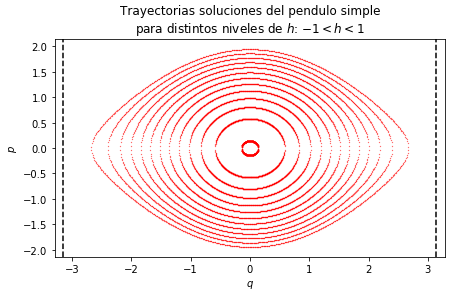

In [9]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))

# creamos un array con todos los valores de h que vamos a usar
h_list = np.linspace(-0.99,1.99, 20)
for h in h_list:
    sol = solucion_pendulo(h,N=1000)
    ax.plot(sol[0], sol[1], 'r.', markersize=0.5)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$q$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectorias soluciones del pendulo simple\npara distintos niveles de $h$: $-1<h<1$')
# rango en el eje de las x
ax.set_xlim(-np.pi-0.15, np.pi+0.15)
# linea vertical en -pi
ax.axvline(x=-np.pi, linestyle='--', color='k')
# linea vertical en pi
ax.axvline(x=np.pi, linestyle='--', color='k')

plt.show()


vemos que el resultado de correr esta parte del código resulta en un ```RuntimeWarning: invalid value encountered in arccos```, esta vez sucede que estamos evaluando el arccos de un valor que es o bien mayor que 1 o bien menor que -1, y estos valores no están permitidos para funciones trigonométricas como el $\cos X$, por lo que cuando intenamos obtener su inversa, nos arroja un warning y el valor que se obtiene en ese caso es un NAN (not a number). El código de todas formas corre, pero a la hora de realizar los gráficos de las trayectorias, aquellos puntos que tengan valores NAN no se grafican.

Lo que si puede verse es que aquellas trayectorias en el regimen de libración sí son graficadas, con lo cual deducimos que el problema surge para aquellas trayectorias para las cuales el regimen es de rotaciones.

Lo que podemos hacer es modificar un poco la función de manera que tenga en cuenta los casos en los que el argumento del arccos tenga un valor absoluto mayor a 1.

In [10]:
def solucion_pendulo2(h, N=100, om0=1.0):
    """
    Descripcion:
    Esta función toma un valor de h para igualar el hamiltoniano del
    pendulo, y resuelve la trayectoria del sistema en el espacio de
    fases simplemente encontrando los valores de q y p que satisfacen
    la condicion H(q,p) = h. La funcion retorna un arrayde valores q,p
    que satisfacen la ecuacion H(p,q)=h.
    
    Parametros:
    ----------
    h: float,
        valor de la energia para calcular la trayectoria en el plano p,q.
    N: int (opcional, toma el valor 100 por defecto),
        numero de puntos donde evaluar la trayectoria. Si no es par
        el codigo arroja un error.
    om0: float (opcional, toma el valor 1.0 por defecto),
        parametro del hamiltoniano. Define la escala del problema
        
    Retorna:
    -------
    sol: ndarray,
        matriz de Nx2, donde N es la cantidad de puntos donde evaluar la
        trayectoria y el 2 corresponde a una columna para q y otra para p.
    """
    
    # chequeo de la paridad de N
    # % es la funcion modulo, o resto en la division entre dos numeros.
    assert N%2 == 0, "El numero de puntos debe ser par!"
    
    val = -h/(om0*om0)
    if abs(val) < 1:
        # valores limite de q
        qlim = np.arccos(val)
    else:
        # valores limite de q
        qlim = np.pi
        
    # guardamos ambos valores en una lista
    qminqmax = [-qlim, qlim]
    # para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
    # ordenamos la lista de menor a mayor
    qminqmax.sort()
    # armamos el array
    N2 = int(N/2)
    q = np.linspace(qminqmax[0], qminqmax[1], num=N2)
    # modificamos el primer y último valor de este array
    eps = 0.001
    q[0] = q[0]+eps
    q[-1] = q[-1]-eps

    # calculamos el valor de p despejado del hamiltoniano
    # por un lado la parte negativa
    pneg = -np.sqrt(2.0*(h + om0**2*np.cos(q)))
    # por el otro la parte positiva
    ppos = np.sqrt(2.0*(h + om0**2*np.cos(q)))

    # armamos el array completo para retornar
    sol = np.ndarray((2,N))
    
    sol[0][:N2] = q
    sol[0][N2:] = q
    sol[1][:N2] = pneg
    sol[1][N2:] = ppos
    
    return sol

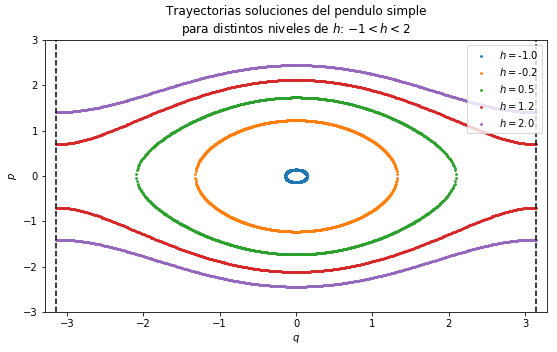

In [11]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# creamos un array con todos los valores de h que vamos a usar
N_h = 5
h_list = np.linspace(-0.99,1.99, N_h)
for h in h_list:
    sol = solucion_pendulo2(h,N=1000)
    ax.plot(sol[0], sol[1], '.', markersize=3.5, label='$h = $'+'%3.1f'%h)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$q$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectorias soluciones del pendulo simple\npara distintos niveles de $h$: $-1<h<2$')
# rango en el eje de las x
ax.set_xlim(-np.pi-0.15, np.pi+0.15)
# rango en el eje de las x
ax.set_ylim(-3,3)
# linea vertical en -pi
ax.axvline(x=-np.pi, linestyle='--', color='k')
# linea vertical en pi
ax.axvline(x=np.pi, linestyle='--', color='k')
# print legend
ax.legend()

plt.show()


Ahora si, pareciera que el código está funcionando como corresponde teniendo en cuenta todas las posibles trayectorias que surgen como soluciones del péndulo simple. También hemos diferenciado en el gráfico las distintas trayectorias que se corresonden con cada uno de los valores de $h$ utilizados.

#### Otra forma de resolver el problema:
Si bien esta forma de resolver las trayectorias del péndulo simple en el espacio de fases es válida, en rigor no hemos integrado las ecuaciones de movimiento del problema. 

Para ello necesitamos alguna función integre un sistema de ecuaciones diferenciales, la cual viene como parte de la librería ```scipy``` de ```Python```. Esta función es  ```scipy.integrate.ode``` y es la que vamos a usar a continuación para resolver el mismo problema que antes pero esta vez integraremos las ecuaciones de Hamilton que nos dan las ecuaciones de movimiento que deben satisfacer la coordenada $q(t)$ y el momento $p(t)$ como funciones del tiempo.

Para lograr esto, vamos a necesitar la función a integrar (las ecuaciones de movimiento) en forma de sus derivadas, por lo que la función ```ec_mov_pendulo_simple``` es donde definiremos estas derivadas:

$\begin{align*}
&\dot{q} = \frac{\partial H}{\partial p}  = p\\
&\dot{p} = -\frac{\partial H}{\partial q} = -\omega_{0}^{2} \sin q.
\end{align*}$

In [12]:
def ec_mov_pendulo_simple(y, t=0, om0 = 1.0):
    """
    Descripcion:
    Esta función es la encargada de calcular las derivadas tanto de
    la coordenada q como del momento p como funcion del tiempo, para
    determinados valores de p y q.
    
    Parametros:
    ----------
    y: ndarray,
        array de dimension 1 y longitud 2, con los valores actuales de q y p,
        primero q y luego p.
    om0: float (opcional, toma el valor 1.0 por defecto),
        parametro del hamiltoniano. Define la escala del problema
    
    Retorna:
    -------
    dy: ndarray,
        array de dimension 1 y longitud 2, con los valores de las derivadas
        de q y de p respecto del tiempo, primero dq/dt y luego dp/dt.
    """
    
    # llamamos a las cosas por su nombre!
    q = y[0]
    p = y[1]
    
    # calculamos las derivadas respecto al tiempo
    qdot = p
    pdot = -om0*om0*np.sin(q)
    
    # asignamos las derivadas calculadas al array de salida
    dy = np.array([qdot, pdot])
    
    return dy

Para la integración de las ecuaciones de movimiento, necesitamos especificar un conjunto de condiciones iniciales, $p_{0}$ y $q_{0}$. Pero estas condiciones iniciales serán específicas para una trayectoria definida por un valor de $h$, por lo que dado un $h$ y un valor inicial para por ejemplo $q_{0}$, definimos las condiciones iniciales a través de definir el nivel de $h$ y la coordenada inicial $q_{0}$ y luego despejar $p_{0}$ de la ecuación Hamiltoniana.

Algo de esto ya hemos visto cuando despejamos la ecuación de la trayectoria para un valor fijo de $h$. Ahora usaremos esos resultados para que nuestras condiciones iniciales tengan sentido.

In [13]:
# importamos la libreria scipy.integrate para integrar sistemas de ecuaciones diferenciales
from scipy import integrate
# importamos una libreria que nos permite seleccionar valores aleatorios
import random

h = 1.1
om0 = 1.0

val = -h/(om0*om0)
if abs(val) < 1:
    # valores limite de q para el regimen de libraciones
    qlim = np.arccos(val)
else:
    # valores limite de q para el regimen de rotaciones
    qlim = np.pi

# guardamos ambos valores en una lista
qminqmax = [-qlim, qlim]
# para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
# ordenamos la lista de menor a mayor
qminqmax.sort()
# seleccionamos un valor de q aleatorio entre los valores limite
q0 = random.uniform(qminqmax[0], qminqmax[1])

# calculamos el valor de p despejado del hamiltoniano
# en principio solo guardamos uno de los dos posibles valores
# de p (el negativo).
p0 = -np.sqrt(2.0*(h + om0**2*np.cos(q0)))

# guardamos los valores iniciales en un array inicial
# con la misma forma que necesitamos para llamar a la 
# funcion de las ecuaciones de movimiento:
y0 = np.array([q0, p0])

# integramos en un rango de tiempos 
Ntiempos = 1000
t = np.linspace(0, 10*np.pi, Ntiempos)

# llamamos a la funcion que integra
y, infodict = integrate.odeint(ec_mov_pendulo_simple, y0, t, full_output=True, rtol=1.0e-14)
print(infodict['message'])

# recuperamos las variables p, q
q, p = y.T

Integration successful.


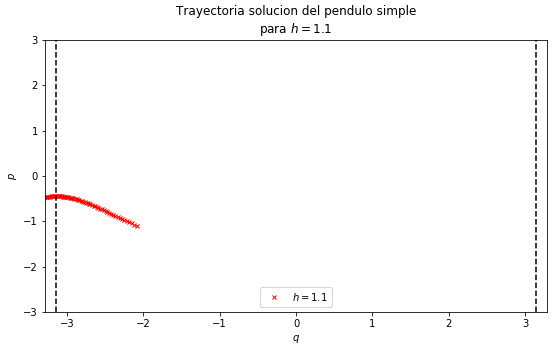

In [14]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# graficamos la solucion
ax.plot(q, p, 'rx', markersize=3.5, label='$h = $'+'%3.1f'%h)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$q$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectoria solucion del pendulo simple\npara $h = $'+'%3.1f'%h)
# rango en el eje de las x
ax.set_xlim(-np.pi-0.15, np.pi+0.15)
# rango en el eje de las x
ax.set_ylim(-3,3)
# linea vertical en -pi
ax.axvline(x=-np.pi, linestyle='--', color='k')
# linea vertical en pi
ax.axvline(x=np.pi, linestyle='--', color='k')
# print legend
ax.legend()

plt.show()

Pareciera que mediante la integración de las ecuaciones de movimiento, estamos obteniendo valores de $q$ que no se encuentran entre $-\pi$ y $\pi$. Lo que tenemos que hacer es modificar un poco el código para que las salidas de $q$ sean moduladas para estar siempre entre $-\pi$ y $\pi$. 

Para ello definimos la siguiente función ```modulate_q```, y la aplicamos a todo el array de valores de q

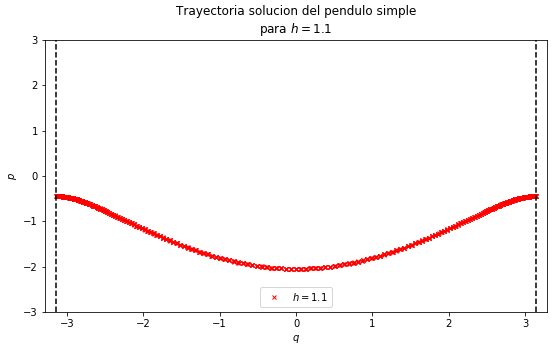

In [15]:
def modulate_q(v):
    twopi = 2*np.pi
    if abs(v) < np.pi:
        return v
    else:
        v = v - np.sign(v)*twopi
        v = modulate_q(v)
        return v
qn = np.array([ modulate_q(v) for v in q ])

# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# graficamos la solucion
ax.plot(qn, p, 'rx', markersize=3.5, label='$h = $'+'%3.1f'%h)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$q$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectoria solucion del pendulo simple\npara $h = $'+'%3.1f'%h)
# rango en el eje de las x
ax.set_xlim(-np.pi-0.15, np.pi+0.15)
# rango en el eje de las x
ax.set_ylim(-3,3)
# linea vertical en -pi
ax.axvline(x=-np.pi, linestyle='--', color='k')
# linea vertical en pi
ax.axvline(x=np.pi, linestyle='--', color='k')
# print legend
ax.legend()

plt.show()

Aun nos queda resolver la cuestión de los dos tipos de soluciones cuando el regimen es de rotación. En este caso, dependiendo de si elegimos la condición inicial para $p_{0}$ que proviene de la raiz posibiva o negativa, tendremos una parte o la otra, por ello, en nuestra implementación del código intentaremos generar ambas soluciones cuando el regimen en el que estemos sea de rotaciones.

In [16]:
def modulate_q(v):
    twopi = 2*np.pi
    if abs(v) < np.pi:
        return v
    else:
        v = v - np.sign(v)*twopi
        v = modulate_q(v)
        return v
    
# importamos la libreria scipy.integrate para integrar sistemas de ecuaciones diferenciales
from scipy import integrate
# importamos una libreria que nos permite seleccionar valores aleatorios
import random

h = 1.1
om0 = 1.0

val = -h/(om0*om0)
if abs(val) < 1:
    # valores limite de q para el regimen de libraciones
    qlim = np.arccos(val)
else:
    # valores limite de q para el regimen de rotaciones
    qlim = np.pi

# guardamos ambos valores en una lista
qminqmax = [-qlim, qlim]
# para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
# ordenamos la lista de menor a mayor
qminqmax.sort()
# seleccionamos un valor de q aleatorio entre los valores limite
q0 = random.uniform(qminqmax[0], qminqmax[1])

# calculamos el valor de p despejado del hamiltoniano
# en principio solo guardamos uno de los dos posibles valores
# de p (el negativo).
p0 = -np.sqrt(2.0*(h + om0**2*np.cos(q0)))

# guardamos los valores iniciales en un array inicial
# con la misma forma que necesitamos para llamar a la 
# funcion de las ecuaciones de movimiento:
y0 = np.array([q0, p0])

# integramos en un rango de tiempos 
Ntiempos = 1000
t = np.linspace(0, 2*np.pi, Ntiempos)

# llamamos a la funcion que integra
y, infodict = integrate.odeint(ec_mov_pendulo_simple, y0, t, full_output=True, rtol=1.0e-14)
print(infodict['message'])

# recuperamos las variables p, q
q, p = y.T

# chequeamos si el regimen es de rotaciones, en cuyo caso
# volvemos a relanzar la integracion usando la condicion inicial
# positiva para p0
if abs(val) > 1:
    # calculamos el valor de p despejado del hamiltoniano
    # en principio solo guardamos uno de los dos posibles valores
    # de p (el negativo).
    p0 = np.sqrt(2.0*(h + om0**2*np.cos(q0)))

    # guardamos los valores iniciales en un array inicial
    # con la misma forma que necesitamos para llamar a la 
    # funcion de las ecuaciones de movimiento:
    y0 = np.array([q0, p0])

    # integramos en un rango de tiempos 
    Ntiempos = 1000
    t = np.linspace(0, 2*np.pi, Ntiempos)

    # llamamos a la funcion que integra
    y, infodict = integrate.odeint(ec_mov_pendulo_simple, y0, t, full_output=True, rtol=1.0e-14)
    print(infodict['message'])

    # recuperamos las variables p, q
    qpos, ppos = y.T
    
# consolidamos ambos resultados en un solo array por coordenada
# para la coordenada
qtot = np.ndarray((len(q)+len(qpos),))
qtot[:len(q)] = q
qtot[len(q):] = qpos
# para la el momento
ptot = np.ndarray((len(p)+len(ppos),))
ptot[:len(p)] = p
ptot[len(p):] = ppos

# ademas corremos el modulador de coordenadas
qn = np.array([ modulate_q(v) for v in qtot ])

Integration successful.
Integration successful.


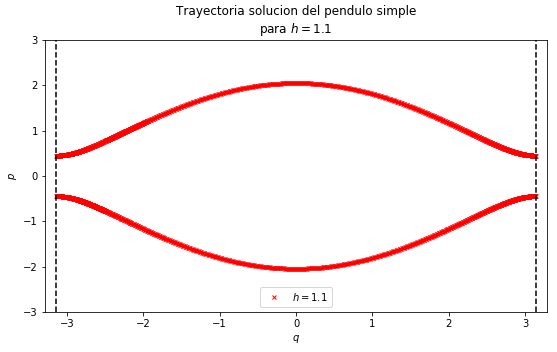

In [17]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# graficamos la solucion
ax.plot(qn, ptot, 'rx', markersize=3.5, label='$h = $'+'%3.1f'%h)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$q$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectoria solucion del pendulo simple\npara $h = $'+'%3.1f'%h)
# rango en el eje de las x
ax.set_xlim(-np.pi-0.15, np.pi+0.15)
# rango en el eje de las x
ax.set_ylim(-3,3)
# linea vertical en -pi
ax.axvline(x=-np.pi, linestyle='--', color='k')
# linea vertical en pi
ax.axvline(x=np.pi, linestyle='--', color='k')
# print legend
ax.legend()

plt.show()

Ahora si parecieramos estar en condiciones de utilizar de forma general la implementación que hemos hecho de integración de las ecuaciones de movimiento del péndulo. 

Para ello vamos a definir una función que realiza una integración para un valor de $h$ específico, y luego haremos un lazo sobre varios valores de $h$ para ver cómo son las soluciones.

In [18]:
def modulate_q(v):
    twopi = 2*np.pi
    if abs(v) < np.pi:
        return v
    else:
        v = v - np.sign(v)*twopi
        v = modulate_q(v)
        return v
    
def solucion_pendulo3(h, N=1000, tfinal=2*np.pi, om0=1.0):
    """
    Descripcion:
    Esta función toma un valor de h para igualar el hamiltoniano del
    pendulo, y resuelve la trayectoria del sistema en el espacio de
    fases mediante la integracion numerica de las ecuaciones de 
    movimiento
    
    Parametros:
    ----------
    h: float,
        valor de la energia para calcular la trayectoria en el plano p,q.
    N: int (opcional, toma el valor 100 por defecto),
        numero de puntos donde evaluar la trayectoria. Si no es par
        el codigo arroja un error.
    tfinal: float,
        tiempo final de la integracion
    om0: float (opcional, toma el valor 1.0 por defecto),
        parametro del hamiltoniano. Define la escala del problema
        
    Retorna:
    -------
    sol: ndarray,
        matriz de Nx2, donde N es la cantidad de puntos donde evaluar la
        trayectoria y el 2 corresponde a una columna para q y otra para p.
    """

    # importamos la libreria scipy.integrate para integrar sistemas de ecuaciones diferenciales
    from scipy import integrate
    # importamos una libreria que nos permite seleccionar valores aleatorios
    import random

    val = -h/(om0*om0)
    if abs(val) < 1:
        # valores limite de q para el regimen de libraciones
        qlim = np.arccos(val)
    else:
        # valores limite de q para el regimen de rotaciones
        qlim = np.pi

    # guardamos ambos valores en una lista
    qminqmax = [-qlim, qlim]
    # para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
    # ordenamos la lista de menor a mayor
    qminqmax.sort()
    # seleccionamos un valor de q aleatorio entre los valores limite
    q0 = random.uniform(qminqmax[0], qminqmax[1])

    # calculamos el valor de p despejado del hamiltoniano
    # en principio solo guardamos uno de los dos posibles valores
    # de p (el negativo).
    p0 = -np.sqrt(2.0*(h + om0**2*np.cos(q0)))

    # guardamos los valores iniciales en un array inicial
    # con la misma forma que necesitamos para llamar a la 
    # funcion de las ecuaciones de movimiento:
    y0 = np.array([q0, p0])

    # integramos en un rango de tiempos 
    Ntiempos = N
    t = np.linspace(0, tfinal, Ntiempos)

    # llamamos a la funcion que integra
    y, infodict = integrate.odeint(ec_mov_pendulo_simple, y0, t, full_output=True, rtol=1.0e-14)
    print(infodict['message'])

    # recuperamos las variables p, q
    q, p = y.T

    # chequeamos si el regimen es de rotaciones, en cuyo caso
    # volvemos a relanzar la integracion usando la condicion inicial
    # positiva para p0
    if abs(val) > 1:
        # calculamos el valor de p despejado del hamiltoniano
        # en principio solo guardamos uno de los dos posibles valores
        # de p (el negativo).
        p0 = np.sqrt(2.0*(h + om0**2*np.cos(q0)))

        # guardamos los valores iniciales en un array inicial
        # con la misma forma que necesitamos para llamar a la 
        # funcion de las ecuaciones de movimiento:
        y0 = np.array([q0, p0])

        # integramos en un rango de tiempos 
        Ntiempos = 1000
        t = np.linspace(0, tfinal, Ntiempos)

        # llamamos a la funcion que integra
        y, infodict = integrate.odeint(ec_mov_pendulo_simple, y0, t, full_output=True, rtol=1.0e-14)
        print(infodict['message'])

        # recuperamos las variables p, q
        qpos, ppos = y.T
    
        # consolidamos ambos resultados en un solo array por coordenada
        # para la coordenada
        qtot = np.ndarray((len(q)+len(qpos),))
        qtot[:len(q)] = q
        qtot[len(q):] = qpos
        # para la el momento
        ptot = np.ndarray((len(p)+len(ppos),))
        ptot[:len(p)] = p
        ptot[len(p):] = ppos

        # ademas corremos el modulador de coordenadas
        qn = np.array([ modulate_q(v) for v in qtot ])
        pn = ptot
        
    else:
        qn = np.array([ modulate_q(v) for v in q ])
        pn = p

    # armamos el array completo para retornar
    sol = np.ndarray((2,len(qn)))
    
    sol[0][:] = qn
    sol[1][:] = pn
    
    return sol

Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.


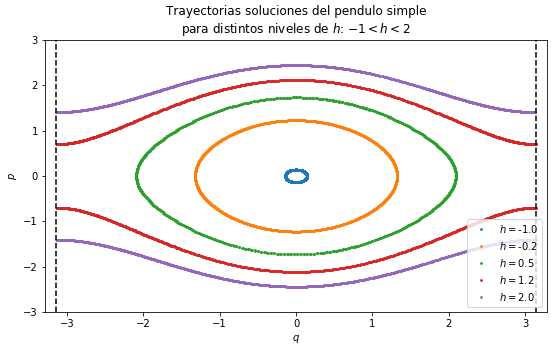

In [19]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# creamos un array con todos los valores de h que vamos a usar
N_h = 5
h_list = np.linspace(-0.99,1.99, N_h)
for h in h_list:
    sol = solucion_pendulo3(h, N=1000, tfinal=abs(4*np.pi/h))
    ax.plot(sol[0], sol[1], '.', markersize=3.5, label='$h = $'+'%3.1f'%h)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$q$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectorias soluciones del pendulo simple\npara distintos niveles de $h$: $-1<h<2$')
# rango en el eje de las x
ax.set_xlim(-np.pi-0.15, np.pi+0.15)
# rango en el eje de las x
ax.set_ylim(-3,3)
# linea vertical en -pi
ax.axvline(x=-np.pi, linestyle='--', color='k')
# linea vertical en pi
ax.axvline(x=np.pi, linestyle='--', color='k')
# print legend
ax.legend()

plt.show()

Podemos ahora para finalizar, comparar ambos resultados, al menos graficamente. Para ello tenemos que modificar un poco la estructura del lienzo que utilizamos para graficar, agregando una fila mas, lo cual nos devolvera en la variable ```ax``` un array con 2 elementos, uno correspondiente al plot de la primer fila y el otro correspondiente al plot de la segunda fila.

Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.


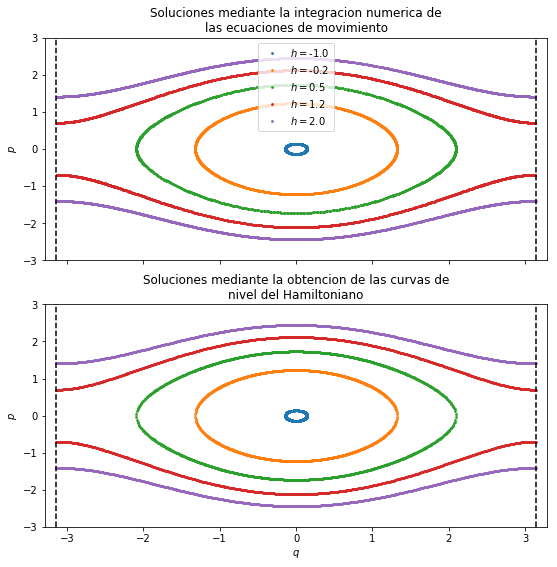

In [20]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(9,9), sharex=True)

# creamos un array con todos los valores de h que vamos a usar
N_h = 5
h_list = np.linspace(-0.99,1.99, N_h)
for h in h_list:
    # solucion a traves de la integracion de las ecuaciones de movimiento
    sol0 = solucion_pendulo3(h, N=1000, tfinal=abs(4*np.pi/h))
    ax[0].plot(sol0[0], sol0[1], '.', markersize=3.5, label='$h = $'+'%3.1f'%h)
    ax[0].set_title('Soluciones mediante la integracion numerica de\nlas ecuaciones de movimiento')
    
    # solucion a traves de hallar la curva que satisface H(q,p) = h
    sol1 = solucion_pendulo2(h,N=1000)
    ax[1].plot(sol1[0], sol1[1], '.', markersize=3.5, label='$h = $'+'%3.1f'%h)
    ax[1].set_title('Soluciones mediante la obtencion de las curvas de\nnivel del Hamiltoniano')    
    
# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax[1].set_xlabel('$q$')
# etiqueta del eje y
ax[0].set_ylabel('$p$')
ax[1].set_ylabel('$p$')
# rango en el eje de las x
ax[0].set_xlim(-np.pi-0.15, np.pi+0.15)
ax[1].set_xlim(-np.pi-0.15, np.pi+0.15)
# rango en el eje de las x
ax[0].set_ylim(-3,3)
ax[1].set_ylim(-3,3)
# linea vertical en -pi
ax[0].axvline(x=-np.pi, linestyle='--', color='k')
ax[1].axvline(x=-np.pi, linestyle='--', color='k')
# linea vertical en pi
ax[0].axvline(x=np.pi, linestyle='--', color='k')
ax[1].axvline(x=np.pi, linestyle='--', color='k')
# print legend
ax[0].legend()

plt.show()

Vemos claramente que ambos metodos arrojan resultados similares, al menos desde el punto de vista cualitativo. Hemos obtenido las soluciones en el espacio de fases de las trayectorias del péndulo simple.

Una diferencia importante que debemos tener en cuenta entre uno y otro caso es que en la integración de las ecuaciones de movimiento, hemos obtenido la solución real del problema, es decir, tenemos los valores de la coordenada $q$ y el momento $p$ para cualquier instante de tiempo.

Mientras que hallando las curvas de nivel del hamiltoniano solo obtenemos las trayectorias, pero nada sabemos acerca de para que instantes de tiempo se llega a un punto u otro. Esto es importante a la hora de analizar, por ejemplo las direcciones en que se realiza el movimiento.

Mediante la integración de las ecuaciones de movimiento tenemos toda la información necesaria para describir el movimiento, incluso la dirección en que este se realiza, así como las velocidades con que se hacen determinados trayectos.

#### Ejercicio 2:
A partir de la expresión de la frecuencia como función de la energía,

$$\omega(h) = \frac{\pi \omega_{0}}{2K(k)}, \quad h<\omega_{0}^{2}; \quad \omega(h) = \frac{\pi \omega_{r}(h)}{2K(k)}, \quad h>\omega_{0}^{2},$$

para oscilaciones y rotaciones respectivamente, con

$$\omega_{r} = \sqrt{\frac{h+\omega_{0}^{2}}{2}}$$

K(k) la integral elíptica completa de primera especie y 

$$k = \sqrt{\frac{h+\omega_{0}^{2}}{2\omega_{0}^{2}}}, \quad h<\omega_{0}^{2}; \quad k = \sqrt{\frac{2\omega_{0}^{2}}{h+\omega_{0}^{2}}}, \quad h>\omega_{0}^{2}.$$

Graficar $\omega$ en función de $h$ tomando $\omega_{0} = 1$.

#### Resolución Ejercicio 2:
Para resolver este ejercicio, dado que la frecuencia que debemos calcular es una función de la integral elíptica completa de primera especie $K(k)$, debemos hacerlo numéricamente.

Para poder evaluar la función $K(k)$, recurrimos nuevamente a las librerías de ```Python``` como ```scipy``` que tienen incorporadas aproximaciones numéricas a este tipo de funciones.

In [22]:
def omega_r(h, om0=1.0):
    """
    Descripcion
    
    """
    
    return np.sqrt((h+om0*om0)/2)
    
def frecuencia_pendulo(h, N=1000, hlims=(-1.0,1.0), om0=1.0):
    """
    Descripcion
    
    """
    
    from scipy import special
    
    # chequeamos si estamos en el caso h < om0**2
    wr = omega_r(h, om0=om0)
    
    if h < om0*om0:
        kpeq = wr/om0
        kbig = special.ellipk(kpeq)
        
        return 0.5*np.pi*om0/kbig
    
    else:
        kpeq = om0/wr
        kbig = special.ellipk(kpeq)
        
        return 0.5*np.pi*wr/kbig

Hemos definido las funciones necesarias para obtener el valor de la frecuencia dado un valor de $h$. Ahora vamos a definir los valores de $h$ en los cuales evaluar la funcion ```frecuencia_pendulo``` y evaluarla en los mismos para obtener un array de valores de la frecuencia.

Luego vamos a graficar los valores obtenidos en un grafico de $\omega$ como función de la energía $h$

In [23]:
# armamos un array de valores de la energia h
hmin = -1
hmax = 2
Nh = 100
hlist = np.linspace(hmin, hmax, Nh)

omega = []
for h in hlist:
    omega.append(frecuencia_pendulo(h))

Ahora tenemos todo listo para poder visualizar los valores de la frecuencia $\omega$, y cómo varían en función de los valores de la energía $h$.

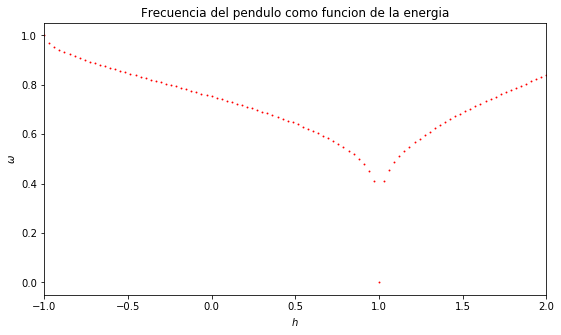

In [24]:
import matplotlib.pyplot as plt

# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# graficamos la solucion
ax.plot(hlist, omega, 'r.', markersize=1.8)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$h$')
# etiqueta del eje y
ax.set_ylabel('$\omega$')
# titulo
ax.set_title('Frecuencia del pendulo como funcion de la energia')
# rango en el eje de las x
ax.set_xlim(hmin, hmax)

plt.show()

Podemos ver que a medida que el valor de la energía se acerca a 1, o mejor dicho a $\omega_{0}^{2}$, la frecuencia se hace muy pequeña, pero no podemos estar seguros de qué es lo que está ocurriendo muy cerca del valor de $h = \omega_{0}^{2}$.

#### Ejercicio 3:
Repetir el ejercicio anterior para $h \in (0.90, 1.01)$ considerando $\approx 100$ valores de $h$ en dicho intervalo.

#### Resolución Ejercicio 3:
Para realizar este ejercicio tenemos todo lo que necesitamos ya definido a partir del ejercicio anterior. Por lo que unicamente definimos nuevos valores para ```hmin```, ```hmax``` y ```Nh```, y volvemos a correr las mismas funciones, junto con la parte del código en la que graficamos los valores de $\omega$ obtenidos.

In [25]:
# armamos un array de valores de la energia h
hmin = 0.90
hmax = 1.01
Nh = 100
hlist = np.linspace(hmin, hmax, Nh)

omega = []
for h in hlist:
    omega.append(frecuencia_pendulo(h))

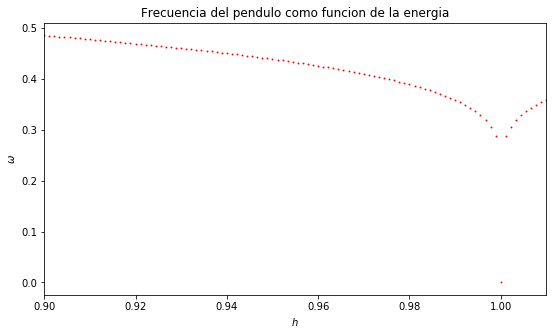

In [26]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# graficamos la solucion
ax.plot(hlist, omega, 'r.', markersize=1.8)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$h$')
# etiqueta del eje y
ax.set_ylabel('$\omega$')
# titulo
ax.set_title('Frecuencia del pendulo como funcion de la energia')
# rango en el eje de las x
ax.set_xlim(hmin, hmax)

plt.show()

Si bien ahora tenemos una visualización mas cercana de lo que está sucediendo cerca de $h = \omega_{0}^{2}$, vemos que la situación sigue siendo similar a la anterior, en la cual a medida que nos acercamos mucho a $\omega_{0}^{2}$ con el valor de la energía, pareciera que la frecuencia tiene casi una discontinuidad.

#### Ejercicio 4:
Comparar el resultado del ejercicio anterior con lo que se obtiene de utilizar la expresión asintótica para la frecuencia en la vecindad de la separatriz:

$$\omega(w) = \frac{\pi \omega_{0}}{\ln \frac{32}{|w|}}, \quad w= \frac{h-\omega_{0}^{2}}{\omega_{0}^{2}}, \quad |w| \ll 1$$

#### Resolución Ejercicio 4:
La expresión asintótica para la frecuencia del péndulo, que solamente es válida para valores de la energía muy cercanos a la energía de la separatriz (es decir, $\omega_{0}^{2}$) es la función que ahora tenemos que escribir en forma de código para poder comparar ambos resultados.

In [27]:
def energía_relativa(h, om0=1.0):
    """
    Descripcion
    
    """
    
    return (h - om0*om0)/om0/om0

def frecuencia_asintotica(h, om0=1.0):
    """
    Descripcion
    
    """
    
    er    = energía_relativa(h, om0=om0)
    abser = abs(er)
    
    denom = np.log(32.0/abser)
    numer = np.pi*om0
    
    return numer/denom

In [28]:
# armamos un array de valores de la energia h
hmin = 0.999
hmax = 1.001
Nh = 10000
hlist = np.linspace(hmin, hmax, Nh)

omega0 = []
omega1 = []
for h in hlist:
    omega0.append(frecuencia_pendulo(h))
    omega1.append(frecuencia_asintotica(h))

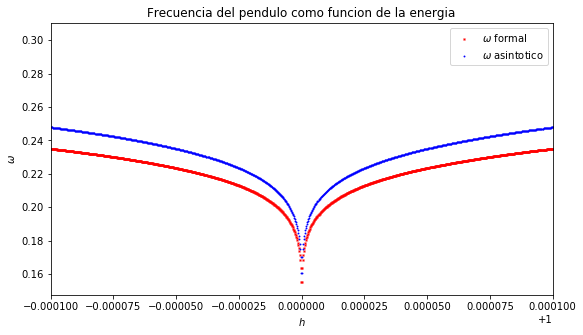

In [30]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# graficamos la solucion
ax.plot(hlist, omega0, 'rx', markersize=1.8, label='$\omega$ formal')
ax.plot(hlist, omega1, 'b.', markersize=1.8, label='$\omega$ asintotico')

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$h$')
# etiqueta del eje y
ax.set_ylabel('$\omega$')
# titulo
ax.set_title('Frecuencia del pendulo como funcion de la energia')
# rango en el eje de las x
ax.set_xlim(1.0-0.0001,1.0+0.0001)
# leyenda
ax.legend()

plt.show()

Vemos que la expresión asintótica de la frecuencia tiene un comportamiento más regular cuando nos acercamos mucho al valor de la energía correspondiente a la separatriz.

#### Ejercicio 5:
Hallar los puntos fijos del Hamiltoniano del péndulo y estudiar su estabilidad lineal. Graficar cualitativamente el espacio de fases del sistema

#### Resolución Ejercicio 5:
La obtención de los puntos de equilibrio de un Hamiltoniano cualquiera $H(q,p)$ se realiza mediante la propuesta de hacer nulo el flujo de la función Hamiltoniana. Es decir, si tenemos un Hamiltoniano cualquiera 

$$H(p,q),$$

sabemos que las ecuaciones de movimiento del sistema que el Hamiltoniano representa son:

$\begin{align*}
&\dot{q} = \frac{\partial H}{\partial p} = u(q,p),\\
&\dot{p} = -\frac{\partial H}{\partial q} = v(q,p).
\end{align*}$

De modo que los puntos fijos del Hamiltoniano $H(q,p)$ serán aquellos $(q_{0}, p_{0})$ tales que se cumple

$\begin{align*}
&\dot{q} = u(q_{0}, p_{0}) = 0,\\
&\dot{p} = v(q_{0}, p_{0}) = 0.
\end{align*}$

Para el caso particular del Hamiltoniano del péndulo, tenemos que encontrar aquellos $(q_{0}, p_{0})$ tales que se satisfagan:

$\begin{align*}
&u(q_{0}, p_{0}) = p_{0} = 0,\\
&v(q_{0}, p_{0}) = -\omega_{0}^{2} \sin q_{0} = 0.
\end{align*}$

La primera ecuación solamente se puede satisfacer si $p_{0} = 0$, por lo tanto cualquier punto fijo estará sobre el eje $p = 0$ del espacio de fases. 

La segunda ecuación en cambio, tiene dos soluciones posibles para $q \in (-\pi, \pi]$ y estas son:

$\begin{align*}
&q_{0} = \pi,\\
&q_{0} = 0.
\end{align*}$

Por lo que los dos puntos fijos que satisfacen que el flujo Hamiltoniano se cero son:

$\begin{align*}
&P_{1} := (q_{0}, p_{0}) = (\pi, 0),\\
&P_{2} := (q_{0}, p_{0}) = (0, 0).
\end{align*}$


##### Estabilidad lineal de los puntos fijos.
Analizar la estabilidad de los puntos fijos de un Hamiltoniano nos puede dar mucha información sobre cómo es el espacio de fases del sistema, sin la necesidad de resolver completamente el mismo.

Para estudiar la estabilidad lineal de los puntos obtenidos anteriormente, primero veremos cómo analizar la estabilidad lineal de cualquier punto fijo y luego lo aplicaremos a cada uno de los puntos hallados antes.

Para estudiar la estabilidad lineal de un punto fijo, lo que hacemos es un desarrollo de taylor a primer orden alrededor del punto fijo, y analizamos como se comporta el sistema en las inmediaciones del punto. Para ello, supongamos que tenemos un punto fijo cualquiera $(q_{0},p_{0})$. 

Definamos el apartamiento en las direcciones de las coordenadas $q$ y de los momentos $p$ respecto del punto fijo como $\zeta$ y $\eta$ respectivamente, de manera que:

$\begin{align*}
&\zeta = q - q_{0},\\
&\eta = p - p_{0},
\end{align*}$

lo cual nos permite escribir a las varibales $q$ y $p$ como

$\begin{align*}
&q = \zeta + q_{0},\\
&p = \eta + p_{0},
\end{align*}$

con lo cual, derivando estas ultimas expresiones podemos escribir

$\begin{align*}
&\dot{q} = \dot{\zeta} = u(q_{0}+\zeta, p_{0}+\eta),\\
&\dot{p} = \dot{\eta}, = v(q_{0}+\zeta, p_{0}+\eta).
\end{align*}$

Estas últimas expresiones las podemos desarrollar en torno al punto fijo $(q_{0},p_{0})$ hasta primer orden, con lo cual se obtiene:

$\begin{align*}
&u(q_{0}+\zeta, p_{0}+\eta) = \frac{\partial u}{\partial q}|_{(q_{0},p_{0})}\zeta + \frac{\partial u}{\partial p}|_{(q_{0},p_{0})}\eta + \mathcal{O}(\zeta^{2},\eta^{2}),\\
&v(q_{0}+\zeta, p_{0}+\eta) = \frac{\partial v}{\partial q}|_{(q_{0},p_{0})}\zeta + \frac{\partial v}{\partial p}|_{(q_{0},p_{0})}\eta + \mathcal{O}(\zeta^{2},\eta^{2}).
\end{align*}$


Definimos entonces la matriz del sistema $\Lambda_{0}$, tal que:

$\begin{align*}
&\vec{\delta} = \begin{bmatrix} 
                \zeta \\
                \eta
                \end{bmatrix}; \quad \Lambda_{0} = \begin{bmatrix}
                                                   u_{q}^{0}& u_{p}^{0}\\
                                                   v_{q}^{0}& v_{p}^{0}
                                                   \end{bmatrix},
\end{align*}$

de modo que podemos reescribir la solución local alrededor del punto fijo como:

$\begin{align*}
&\dot{\vec{\delta}} = \Lambda_{0} \vec{\delta}
\end{align*}$


##### Estabilidad del punto fijo $P_{1} := (\pi, 0)$.
Para este punto fijo, la matriz $\Lambda_{0}$ tiene la expresión:

$\begin{align*}
&\Lambda_{0} = \begin{bmatrix}
                u_{q}^{0}=0& u_{p}^{0}=1\\
                v_{q}^{0}=\omega_{0}^{2}& v_{p}^{0}=0
               \end{bmatrix} = \begin{bmatrix}
                                0& 1\\
                                \omega_{0}^{2}& 0
                               \end{bmatrix}.
\end{align*}$

Tenemos que buscar los autovalores de esta matriz para ver como es el movimiento alrededor del punto fijo, luego

$\begin{align*}
&\Lambda_{0} = det(\Lambda_{0} - \lambda I) = 0
\end{align*}$

que nos define  la siguiente ecuación característica:

$\begin{align*}
&\begin{vmatrix}
  -\lambda & 1\\
  \omega_{0}^{2} & -\lambda
 \end{vmatrix} =0, \quad \lambda^{2} - \omega_{0}^{2} = 0
\end{align*}$ 

Las soluciones serán $\lambda_{+} = \omega_{0}$ y $\lambda_{-} = -\omega_{0}$. Es decir, tenemos un autovalor positivo y uno negativo. Los autovectores asociados a cada uno de estos autovalores respectivamente serán $\vec{e}_{+}$ y $\vec{e}_{-}$, de manera que:

$\begin{align*}
&\Lambda \vec{e}_{\pm} = \lambda_{\pm} \vec{e}_{\pm}, \\
&\begin{bmatrix}
  0 & 1\\
  \omega_{0}^{2} & 0
 \end{bmatrix} \begin{bmatrix}
                \zeta_{+}\\
                \eta_{+}
               \end{bmatrix} = \omega_{0}\begin{bmatrix}
                                          \zeta_{+}\\
                                          \eta_{+}
                                         \end{bmatrix},
\end{align*}$ 

lo cual define el sistema de ecuaciones:

$\begin{align*}
&\eta_{+} = \omega_{0} \zeta_{+}, \\
&\omega_{0}^{2} \zeta_{+} = \omega_{0} \eta_{+}.
\end{align*}$ 

Así obtenemos que para los dos valores $\lambda_{\pm}$, las componentes de los autovectores asociados a cada uno de ellos serán

$\begin{align*}
&\frac{\eta_{+}}{\zeta_{+}} =  \omega_{0}, \\
&\frac{\eta_{-}}{\zeta_{-}} = -\omega_{0}.
\end{align*}$ 

Es decir que los autovectores son de la forma

$\begin{align*}
&\vec{e}_{+} = \begin{bmatrix}
                1\\
                \omega_{0}
               \end{bmatrix}, \\
&\vec{e}_{-} = \begin{bmatrix}
                1\\
                -\omega_{0}
               \end{bmatrix}.
\end{align*}$ 


La matriz en la base de los autovectores estará dada por

$\begin{align*}
&\hat{\Lambda}^{0}_{\vec{e}_{+},\vec{e}_{-}} = \begin{bmatrix}
                                                \omega_{0} & 0 \\
                                                0 & -\omega_{0}
                                               \end{bmatrix}
\end{align*}$ 

Por lo que si planteamos un vector solución en la base de autovectores 

$\begin{align*}
&\vec{\delta}_{\vec{e}_{+},\vec{e}_{-}} = \begin{bmatrix}
                                           \hat{\zeta}\\
                                           \hat{\eta}
                                          \end{bmatrix}
\end{align*}$

la solución será

$\begin{align*}
&\begin{bmatrix}
   \dot{\hat{\zeta}}\\
   \dot{\hat{\eta}}
  \end{bmatrix} =  \begin{bmatrix}
                    \omega_{0} & 0 \\
                    0 & -\omega_{0}
                   \end{bmatrix} \begin{bmatrix}
                                  \hat{\zeta}\\
                                  \hat{\eta}
                                 \end{bmatrix} ,
\end{align*}$

que es lo mismo que el sistema de ecuaciones

$\begin{align*}
   &\dot{\hat{\zeta}} = \omega_{0} \hat{\zeta}\\
   &\dot{\hat{\eta}}  = -\omega_{0} \hat{\eta},
\end{align*}$

cuyas soluciones son de la forma

$\begin{align*}
   &\hat{\zeta}(t) = \hat{\zeta}_{0} \exp{(\omega_{0} t)}\\
   &\hat{\eta}(t)  = \hat{\eta}_{0} \exp{(-\omega_{0} t)}.
\end{align*}$

Es decir que las soluciones en las direcciones de los autovectores son exponenciales, un creciente y la otra decreciente. Esto nos permite inferir que el punto fijo es un punto silla o de ensilladura, ya que por una de las ramas, las soluciones convergen al punto, mientras que por la otra divergen de el. 

Si quisieramos enccontrar las soluciones en las coordenadas $\zeta$ y $\eta$ originales, podemos hacer uso de la matrix cambio de base:

$\begin{align*}
&\begin{bmatrix}
   1 & 1\\
   \omega_{0} & -\omega_{0}
  \end{bmatrix},
\end{align*}$

a traves de la cual obtenemos las soluciones

$\begin{align*}
   &\zeta(t) = \hat{\zeta}_{0} \exp{(\omega_{0} t)} + \hat{\eta}_{0} \exp{(-\omega_{0} t)}\\
   &\eta(t)  = \hat{\zeta}_{0} \omega_{0} \exp{(\omega_{0} t)} + \hat{\eta}_{0} \omega_{0} \exp{(-\omega_{0} t)}
\end{align*}$

El punto $P_{1} := (\pi, 0)$ es un punto inestable.

##### Estabilidad del punto fijo $P_{2} := (0, 0)$.
Para este punto fijo, la matriz $\Lambda_{0}$ tiene la expresión:

$\begin{align*}
&\Lambda_{0} = \begin{bmatrix}
                u_{q}^{0}=0& u_{p}^{0}=1\\
                v_{q}^{0}=-\omega_{0}^{2}& v_{p}^{0}=0
               \end{bmatrix} = \begin{bmatrix}
                                0& 1\\
                                -\omega_{0}^{2}& 0
                               \end{bmatrix}.
\end{align*}$

Tenemos que buscar los autovalores de esta matriz para ver como es el movimiento alrededor del punto fijo, luego

$\begin{align*}
&\Lambda_{0} = det(\Lambda_{0} - \lambda I) = 0
\end{align*}$

que nos define  la siguiente ecuación característica:

$\begin{align*}
&\begin{vmatrix}
  -\lambda & 1\\
  -\omega_{0}^{2} & -\lambda
 \end{vmatrix} =0, \quad \lambda^{2} + \omega_{0}^{2} = 0
\end{align*}$ 

Las soluciones serán $\lambda_{+} = i\omega_{0}$ y $\lambda_{-} = -i\omega_{0}$. Es decir, en este caso tenemos un autovalor imaginario puro y su conjugado. Los autovectores asociados a cada uno de estos autovalores respectivamente serán $\vec{e}_{+}$ y $\vec{e}_{-}$, de manera que:

$\begin{align*}
&\Lambda \vec{e}_{\pm} = \lambda_{\pm}\vec{e}_{\pm}, \\
&\begin{bmatrix}
  0 & 1\\
  -\omega_{0}^{2} & 0
 \end{bmatrix} \begin{bmatrix}
                \zeta_{+}\\
                \eta_{+}
               \end{bmatrix} = i \omega_{0}\begin{bmatrix}
                                          \zeta_{+}\\
                                          \eta_{+}
                                         \end{bmatrix},
\end{align*}$ 

lo cual define el sistema de ecuaciones:

$\begin{align*}
&\eta_{+} = i\omega_{0} \zeta_{+}, \\
&-\omega_{0}^{2} \zeta_{+} = i\omega_{0} \eta_{+}.
\end{align*}$ 

Así obtenemos que para ambos valores $\lambda_{\pm}$ las componentes de los autovectores asociados a cada uno de ellos serán

$\begin{align*}
&\frac{\eta_{+}}{\zeta_{+}} =  i\omega_{0}, \\
&\frac{\eta_{-}}{\zeta_{-}} =  -i\omega_{0}.
\end{align*}$ 

Es decir que los autovectores son de la forma

$\begin{align*}
&\vec{e}_{+} = \begin{bmatrix}
                1\\
                i\omega_{0}
               \end{bmatrix}, \\
&\vec{e}_{-} = \begin{bmatrix}
                1\\
                -i\omega_{0}
               \end{bmatrix}.
\end{align*}$ 


Utilizando el mismo planteo que para el punto fijo anterior, la solucion en la base de autovectores será

$\begin{align*}
&\begin{bmatrix}
   \dot{\hat{\zeta}}\\
   \dot{\hat{\eta}}
  \end{bmatrix} =  \begin{bmatrix}
                    i\omega_{0} & 0 \\
                    0 & -i\omega_{0}
                   \end{bmatrix} \begin{bmatrix}
                                  \hat{\zeta}\\
                                  \hat{\eta}
                                 \end{bmatrix} ,
\end{align*}$

que es lo mismo que el sistema de ecuaciones

$\begin{align*}
   &\dot{\hat{\zeta}} = i\omega_{0} \hat{\zeta}\\
   &\dot{\hat{\eta}}  = -i\omega_{0} \hat{\eta},
\end{align*}$

cuyas soluciones son de la forma

$\begin{align*}
   &\hat{\zeta}(t) = \hat{\zeta}_{0} \exp{(i\omega_{0} t)}\\
   &\hat{\eta}(t)  = \hat{\eta}_{0} \exp{(-i\omega_{0} t)}.
\end{align*}$

Es decir, en este caso hemos hallado soluciones trigonometricas alrededor del punto fijo $P_{2}$. Estas soluciones, o mejor dicho sus partes reales, definen una trayectoria eliptica alrededor del punto fijo, con frecuenia $\omega_{0}$. Por lo que dadas condiciones iniciales lo suficientemente cerca de este punto de fijo, las trayectorias permaneceran siempre cerca del mismo, en una orbita eliptica.

El punto $P_{2} := (0, 0)$ es un punto estable ya que las soluciones cercanas a el nunca divergen.